In [1]:
import cv2
import yaml
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as PImage
from detection.utils.plot import plothist
from detection.utils.bbox import format_yolov5
from detection.utils.image import drawBox
from detection.utils.dataset import Dataset, readLabel_yolo, split

# 1. Data Exploration

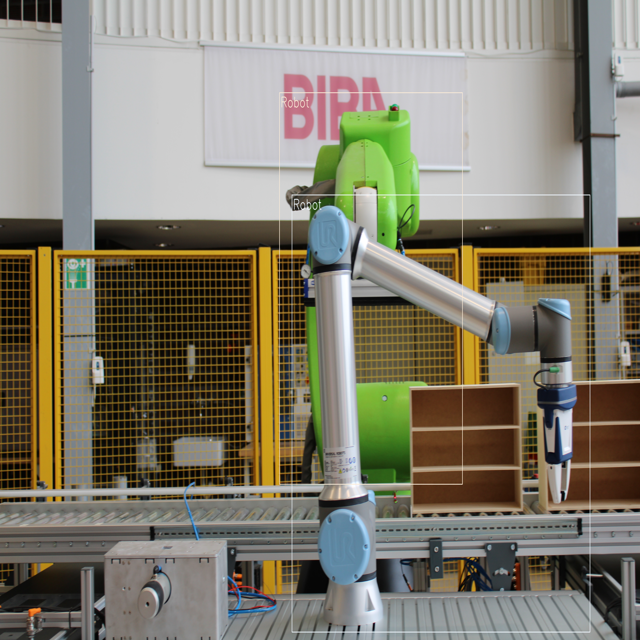

In [2]:
data = yaml.load(open("detection/dataset/data_whole.yaml"), Loader=yaml.SafeLoader)
img = np.array(PImage.open("detection/dataset/machine/images/IMG_0197.JPG"))
targets = np.genfromtxt("detection/dataset/machine/whole/labels/IMG_0197.txt", delimiter=" ")
targets = format_yolov5(targets, img)

img_anno = PImage.fromarray(drawBox(img, targets, data["names"], targets_type="rel:pascal_voc"))
display(img_anno.resize((640, 640)))

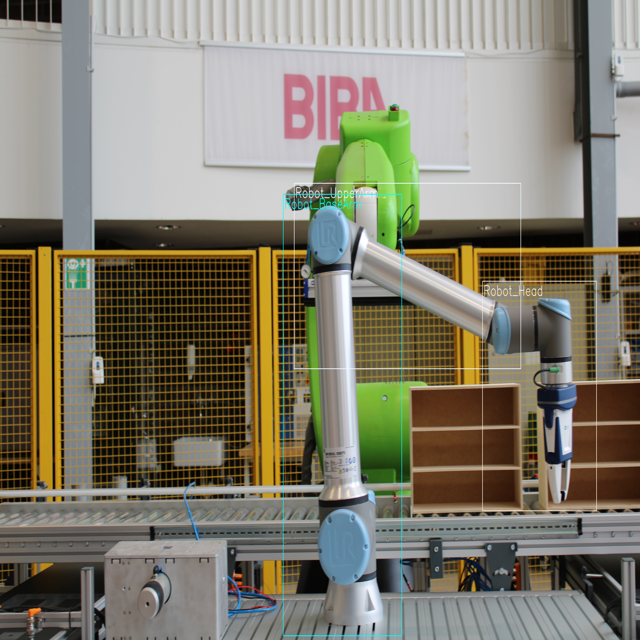

In [3]:
data = yaml.load(open("detection/dataset/data.yaml"), Loader=yaml.SafeLoader)
img = np.array(PImage.open("detection/dataset/machine/images/IMG_0197.JPG"))
targets = np.genfromtxt("detection/dataset/machine/parts/labels/IMG_0197.txt", delimiter=" ")
targets = format_yolov5(targets, img)

img_anno = PImage.fromarray(drawBox(img, targets, data["names"], targets_type="rel:pascal_voc"))
display(img_anno.resize((640, 640)))

# 2. Preprocessing

### 2.1.1 Import labels

In [6]:
data_whole = yaml.load(open("detection/dataset/data_whole.yaml"), Loader=yaml.SafeLoader)
whole_class_names = data_whole["names"]
df_whole_label = readLabel_yolo(label_dir="detection/dataset/machine/whole/labels", class_names=whole_class_names)
print("Machine Dataset")
display(df_whole_label.sample(5))

data_parts = yaml.load(open("detection/dataset/data.yaml"), Loader=yaml.SafeLoader)
parts_class_names = data_parts["names"]
df_parts_label = readLabel_yolo(label_dir="detection/dataset/machine/parts/labels", class_names=parts_class_names)
print("Machine Parts Dataset")
display(df_parts_label.sample(5))

Machine Dataset


,filename,x,y,w,h,cat
1185,IMG_0714,0.350000,0.696094,0.350000,0.607812,4
1803,IMG_1037,0.803125,0.184375,0.185156,0.347656,4
1840,IMG_1057,0.871094,0.314063,0.257812,0.280469,3
1259,IMG_0744,0.642188,0.521875,0.111719,0.239063,0
1286,IMG_0759,0.610156,0.548438,0.633594,0.902344,4


Machine Parts Dataset


,filename,x,y,w,h,cat
1155,IMG_0399,0.587500,0.413281,0.077344,0.124219,0
1126,IMG_0395,0.497656,0.496094,0.138281,0.221094,0
1189,IMG_0403,0.483594,0.421875,0.040625,0.062500,1
3583,IMG_0935,0.654687,0.484375,0.032031,0.157812,9
3658,IMG_0955,0.584375,0.809375,0.198437,0.366406,11


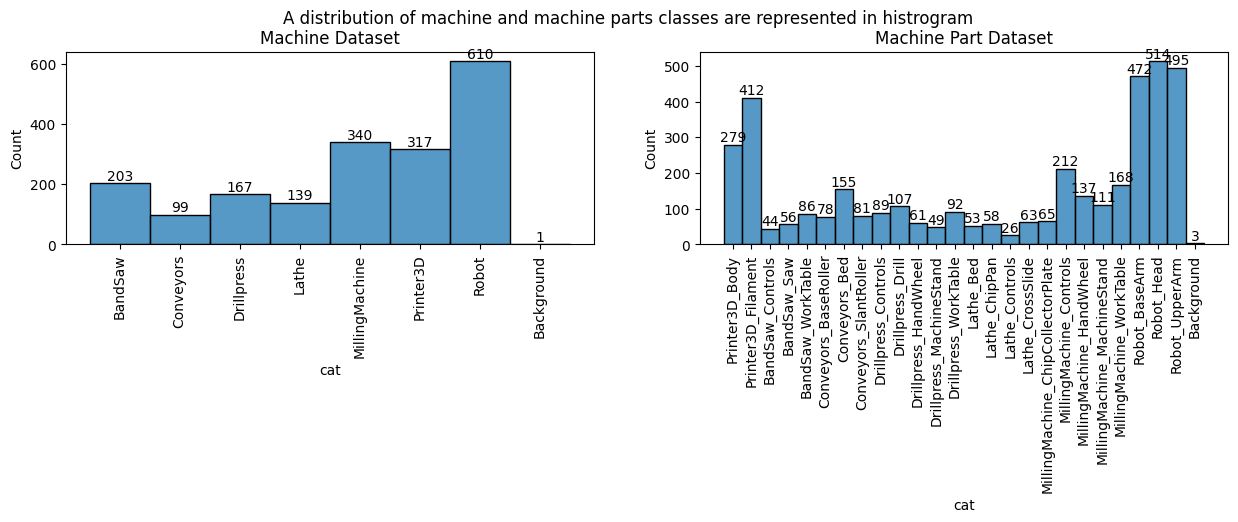

<Figure size 640x480 with 0 Axes>

In [7]:
fig, axe = plt.subplots(1, 2, figsize=(15, 2.5))
fig.suptitle("A distribution of machine and machine parts classes are represented in histrogram", y=1.05)
plothist(axe[0], df_whole_label["cat"], whole_class_names + ["Background"], title="Machine Dataset", rotation=90)
plothist(axe[1], df_parts_label["cat"], parts_class_names + ["Background"], title="Machine Part Dataset", rotation=90)
plt.show()
plt.tight_layout()

### 2.1.2 Generate each class using augmentation 

In [6]:
whole_dataset = Dataset(
    data_path="detection/dataset/data_whole.yaml",
    image_dir="detection/dataset/machine/images",
    label_dir="detection/dataset/machine/whole/labels",
    saved_dir="detection/dataset/machine_preprocessed/whole2",
    resize=(640, 640),)
whole_dataset.copy_org()
whole_dataset.balance_class(limit=700)

In [ ]:
parts_dataset = Dataset(
    data_path="detection/dataset/data.yaml",
    image_dir="detection/dataset/machine/images",
    label_dir="detection/dataset/machine/parts/labels",
    saved_dir="detection/dataset/machine_preprocessed/parts2",
    resize=(640, 640),)
parts_dataset.copy_org()
parts_dataset.balance_class(limit=700)

In [8]:
df_whole_label = readLabel_yolo(label_dir="detection/dataset/machine_preprocessed/whole2/labels", class_names=whole_class_names)
display(df_whole_label.sample(5))

df_parts_label = readLabel_yolo(label_dir="detection/dataset/machine_preprocessed/parts2/labels", class_names=parts_class_names)
display(df_parts_label.sample(5))

,filename,x,y,w,h,cat
1448,IMG_0504_c7c831a41096a820c4907650ad072c14bd035...,0.100000,0.100000,0.100000,0.100000,7.0
3620,IMG_0915_335221c31521ad99b4be09f3ff24f3491c841...,0.507812,0.501563,0.266406,0.634375,2.0
1063,IMG_0460_f0b8932daab62d7fb1338b223e035539a112b...,0.540625,0.471875,0.516406,0.943750,1.0
886,IMG_0427_4904e5dad00de89d3232e45172f797eeb1406...,0.606250,0.703125,0.102344,0.135937,5.0
4516,IMG_1062_79146fe0c954e8763e9976df3a3eb1c7f1450...,0.434375,0.530469,0.222656,0.209375,0.0


,filename,x,y,w,h,cat
4986,IMG_0726_14b3b5029c46ff15a28ec08054a53512f86cd...,0.326562,0.228906,0.085938,0.117969,17.0
3061,IMG_0513_1746e075ebe5b1d2531d3a5badbc49637b723...,0.810156,0.492188,0.275781,0.288281,6.0
980,IMG_0361_c349b86fe8720c2ccc5effa1eb72b8a68a9f3...,0.506250,0.537500,0.246875,0.439063,0.0
5137,IMG_0734_6a46630fd9b1ed058870dc1818735ac9848c5...,0.450781,0.446875,0.038281,0.088281,18.0
11770,IMG_1052_9df195cabd2f17da58ded7f55929078e2dd46...,0.649219,0.420312,0.353125,0.202344,4.0


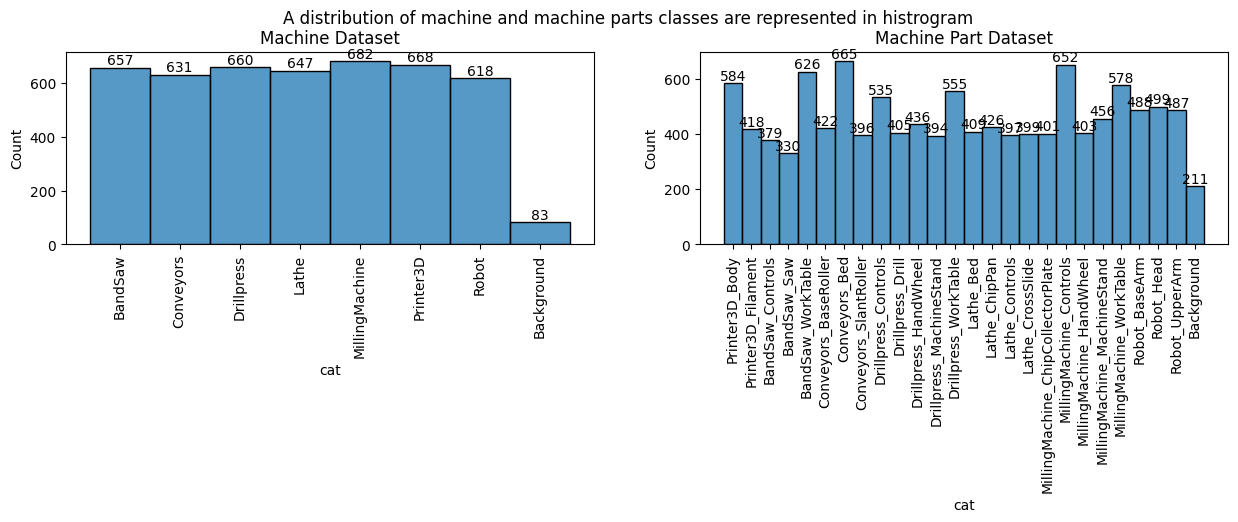

<Figure size 640x480 with 0 Axes>

In [9]:
fig, axe = plt.subplots(1, 2, figsize=(15, 2.5))
fig.suptitle("A distribution of machine and machine parts classes are represented in histrogram", y=1.05)
plothist(axe[0], df_whole_label["cat"], whole_class_names + ["Background"], title="Machine Dataset", rotation=90)
plothist(axe[1], df_parts_label["cat"], parts_class_names + ["Background"], title="Machine Part Dataset", rotation=90)
plt.show()
plt.tight_layout()

### 2.1.3 Split dataset

In [44]:
whole_dataset_split = split(
    df_label=df_whole_label, 
    dataset_dir="detection/dataset/machine_preprocessed/whole2",
    val_size=0.2, test_size=0.1, stratify=True,
    saved=True,
    saved_dir="detection/dataset/machine_whole2")

parts_dataset_split = split(
    df_label=df_parts_label, 
    dataset_dir="detection/dataset/machine_preprocessed/parts2",
    val_size=0.2, test_size=0.1, stratify=True,
    saved=True,
    saved_dir="detection/dataset/machine_parts2")

NameError: name 'whole_dataset_split' is not defined

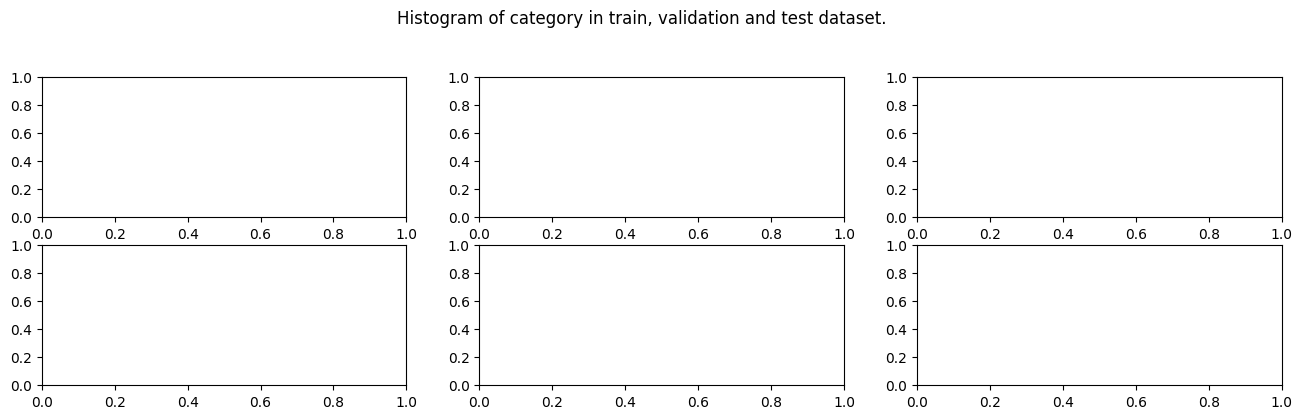

In [13]:
fig, axe = plt.subplots(2, 3, figsize=(16, 4))
fig.suptitle("Histogram of category in train, validation and test dataset.", y=1.05)
plothist(axe[0][0], whole_dataset_split["y_train"], whole_class_names + ["nothing"], title="Train Machine Dataset")
plothist(axe[0][1], whole_dataset_split["y_val"], whole_class_names + ["nothing"], title="Validation Machine Dataset")
plothist(axe[0][2], whole_dataset_split["y_test"], whole_class_names + ["nothing"], title="Test Machine Dataset")
plothist(axe[1][0], parts_dataset_split["y_train"], parts_class_names + ["nothing"], title="Train Machine Parts Dataset")
plothist(axe[1][1], parts_dataset_split["y_val"], parts_class_names + ["nothing"], title="Validation Machine Parts Dataset")
plothist(axe[1][2], parts_dataset_split["y_test"], parts_class_names + ["nothing"], title="Test Machine Parts Dataset")
plt.show()


## 2.2 Machine Parts

### 2.2.1 Import labels

In [8]:
data = yaml.load(open("detection/dataset/data.yaml"), Loader=yaml.SafeLoader)
class_names = data["names"]
df_label = readLabel_yolo(label_dir="detection/dataset/machine/parts/labels", class_names=class_names)
df_label.sample(5)

,filename,x,y,w,h,cat
457,IMG_0272,0.598437,0.156250,0.059375,0.114844,0
3681,IMG_0960,0.593750,0.569531,0.022656,0.155469,9
1909,IMG_0519,0.215625,0.038281,0.108594,0.042188,24
2104,IMG_0551,0.890625,0.486719,0.029687,0.026562,1
3156,IMG_0804,0.415625,0.350000,0.048438,0.124219,18


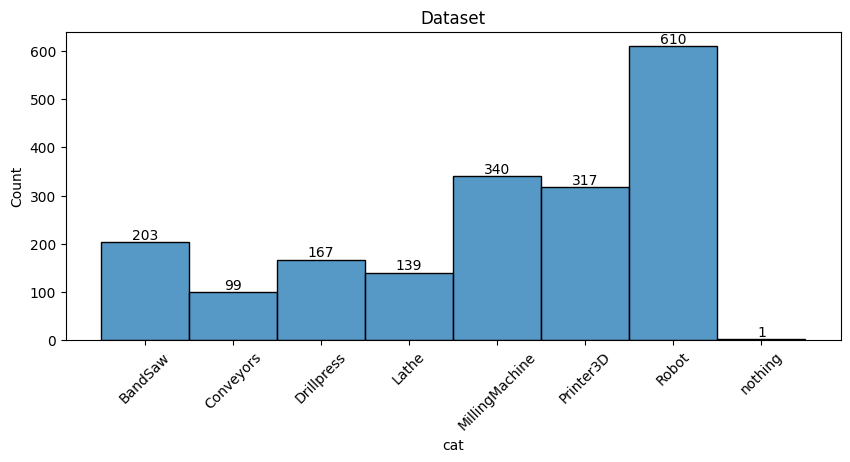

In [ ]:
fig, axe = plt.subplots(figsize=(10, 4))
plothist(axe, df_label["cat"], class_names + ["nothing"], title="Dataset")
plt.show()

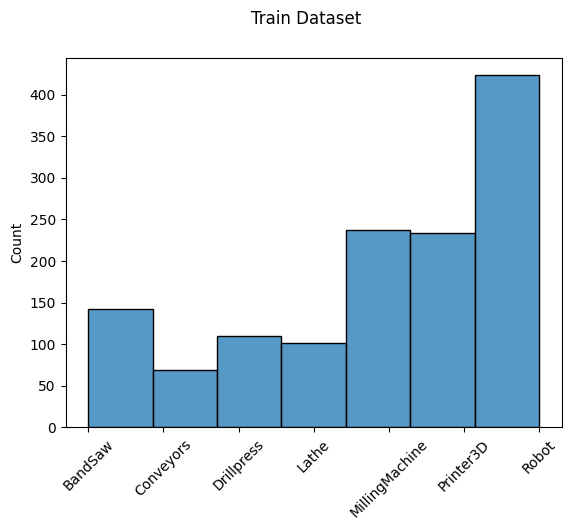

In [8]:
path = "machine_detection2-1/train/labels/"

a_list = []
a_list2 = {}
for filepath in Path(path).iterdir():
    a_arr = np.genfromtxt(filepath, delimiter=" ")
    if len(a_arr.shape) == 1:
        a_arr = a_arr.reshape(1,-1)
    a_list2[filepath.stem] = a_arr[:,0]
    for item in a_arr[:,0]:
        a_list.append(item)

classes = data["names"]
tt_classes = len(classes)
fig, axe = plt.subplots()
fig.suptitle("Train Dataset")
sns.histplot(a_list, ax=axe, bins=tt_classes)
axe.set_xticks(range(0, tt_classes))
axe.set_xticklabels(classes, rotation=45)
plt.show()


In [10]:
a = np.array(a_list)
unique, counts = np.unique(a, return_counts=True)
target = max(counts)
a = dict(zip(unique, target-counts))
a

{0.0: 281, 1.0: 354, 2.0: 313, 3.0: 322, 4.0: 186, 5.0: 190, 6.0: 0}

In [6]:
from detection.utils.augmentation import flip_horizontal, crop
import random


In [13]:
label_id = 0
img_names = [k for k, v in a_list2.items() if label_id in v]
img_names_random = random.choices(img_names, k=1)
print(img_names_random)
for i in img_names_random:
    img = cv2.imread(f"machine_detection2-1/train/images/{i}.JPG")
    targets = np.genfromtxt(f"machine_detection2-1/train/labels/{i}.txt", delimiter=" ")
    targets = format_yolov5(targets, img)
    img, targets = flip_horizontal(img, targets)
    cv2.imwrite(f"detection/versions/version1/images/{i}.JPG", img)
    np.savetxt(f"detection/versions/version1/labels/{i}.txt", targets, fmt="%.8f", delimiter=",")

['IMG_0790_JPG.rf.6ed14c6e5d0d0e45311f858638d90f69']


In [2]:
data = yaml.load(open("detection/dataset/data_whole.yaml"), Loader=SafeLoader)
img = cv2.imread("detection/versions/version1/images/IMG_0790_JPG.rf.6ed14c6e5d0d0e45311f858638d90f69.JPG")
targets = np.genfromtxt("detection/versions/version1/labels/IMG_0790_JPG.rf.6ed14c6e5d0d0e45311f858638d90f69.txt", delimiter=",")
# targets = format_yolov5(targets, img)
print(targets)

img_anno = drawBox(img, targets, data["names"])
cv2.imwrite("results/IMG_0790_anno.JPG", img_anno)

[[ 95.75 160.   420.25 640.     4.  ]
 [106.75 205.   178.25 323.     2.  ]
 [ 34.   292.75 134.   449.25   0.  ]]
409600
0.1024
0.512
0.512


True